#### Scraping from the Goodreads Website --- https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1

In [1]:
# import os
# import re
# import pandas as pd
# import scrapy
# from scrapy.crawler import CrawlerProcess

# class GoodReadsSpider(scrapy.Spider):
#     name = 'goodreads_spider'
#     download_delay = 0.25 # Avoid requesting too quickly.

#     def start_requests(self):
#         for page_id in range(START_PAGE, END_PAGE+1):
#             page_url = f'https://www.goodreads.com/list/show/1.Best_Books_Ever?page={page_id}'
#             yield scrapy.Request(url=page_url, callback=self.parse_page)


#  def parse_page(self, selector):
# 		# Instead of parsing the hierarchy, just pull all `bookTitle` anchors, which are the titles/links of the books in the list.
# 		all_book_titles = selector.css('a.bookTitle')
# 		for curr_book in all_book_titles:
# 			book_link = curr_book.attrib['href']
# 			book_url = f'https://www.goodreads.com{book_link}'
# 			yield selector.follow(url=book_url, callback=self.parse_book)
# 		#end
# 	#end

# 	def parse_book(self, selector):
# 		# Values we will fill in.
# 		book_title = None
# 		book_orig_title = None # Title in the original language.
# 		book_series = None
# 		book_language = None
# 		book_authors = []
# 		book_avg_rating = None
# 		book_num_ratings = None
# 		book_num_reviews = None
# 		book_genres = []
# 		book_description = ''

# 		# Regular title (usually in English).
# 		book_title = selector.css('h1#bookTitle::text').get()
# 		book_title = None if book_title is None else book_title.strip()

# 		# Each book has a metadata listing, but it's quite difficult to parse, so grab it all.
# 		book_data = selector.css('#bookDataBox > div.clearFloats')
# 		for data in book_data:
# 			# What and how we parse differs based on the value of this.
# 			row_title = data.css('.infoBoxRowTitle::text').get()

# 			# Original book title.
# 			if 'Original Title' == row_title:
# 				book_orig_title = data.css('.infoBoxRowItem::text').get()
# 				book_orig_title = None if book_orig_title is None else book_orig_title.strip() # Cleanup.
# 			#end

# 			# Series.
# 			if 'Series' == row_title:
# 				book_series = data.css('.infoBoxRowItem > a::text').get()
# 				hash_idx = book_series.find('#')
# 				if hash_idx != -1:
# 					book_series = book_series[:hash_idx-1]
# 				#end
# 			#end

# 			# Language.
# 			if 'Edition Language' == row_title:
# 				book_language = data.css('.infoBoxRowItem::text').get()
# 				book_language = None if book_language is None else book_language.strip()
# 			#end
# 		#end

# 		# Author(s).  Multiple can be listed.
# 		for author in selector.css('.authorName__container'):
# 			author_name = author.css('a > span::text').get()
# 			author_role = author.css('.role::text').get()
# 			# Add either just the author or combined with their role.
# 			book_authors.append(author_name if author_role is None else ' '.join([author_name, author_role]))
# 		#end

# 		# Average rating (?/5).
# 		book_avg_rating = selector.css('span[itemprop="ratingValue"]::text').get()
# 		if book_avg_rating != None:
# 			book_avg_rating = book_avg_rating.strip()

# 		# Number of ratings and reviews are deep in `#bookMeta` in impossible to differentiate tags.
# 		# Unfortunately the only real solution here is to get all children and find which has `ratings` and `reviews` in it!
# 		book_metas = selector.css('#bookMeta > a::text').getall()
# 		#
# 		# Ratings (contains `ratings`).
# 		num_ratings_idx = [i for i,s in enumerate(book_metas) if ('ratings' in s or 'rating' in s)]
# 		if len(num_ratings_idx):
# 			book_num_ratings = book_metas[num_ratings_idx[0]].replace('\n', '').replace(',', '').replace('ratings', '').replace('rating', '').strip()
# 		# Reviews (contains `reviews`).
# 		num_reviews_idx = [i for i,s in enumerate(book_metas) if ('reviews' in s or 'review' in s)]
# 		if len(num_reviews_idx):
# 			book_num_reviews = book_metas[num_reviews_idx[0]].replace('\n', '').replace(',', '').replace('reviews', '').replace('review', '').strip()
# 		#end

        
        
# 		# Genre(s).
# 		book_genres = selector.css('div.left > a.bookPageGenreLink::text').getall()

        
        
        
# 		# Description (see function comments).
# 		desc_texts = self.process_book_description(selector.xpath('//*[@id="description"]/span[contains(@style, "display:none")]/node()').getall())
# 		book_description = ' '.join(desc_texts)
# 		# The `display:none` span is only present when the preview needs expanding. If the preview is small enough, it's just
# 		# a regular span. So, repeat the above process for a normal span if the text is empty
# 		if not len(book_description):
# 			desc_texts = self.process_book_description(selector.xpath('//*[@id="description"]/span/node()').getall())
# 			book_description = ' '.join(desc_texts)


# 		## Error checking.
# 		# Needs title.
# 		if None == book_title:
# 			print(f'Error: Missing book title ({selector.url}).')
# 			return
# 		# Original title.
# 		if None == book_orig_title:
# 			print(f'Warning: Missing book original title ({selector.url}).')
# 		# Series.
# 		if None == book_series:
# 			print(f'Warning: Book missing series ({selector.url}).')
# 		# Language.
# 		if None == book_language:
# 			print(f'Warning: Book missing language ({selector.url}).')
# 		# Authors.
# 		if not len(book_authors):
# 			print(f'Warning: Book missing authors ({selector.url}).')
# 		# Average rating.
# 		if None == book_avg_rating:
# 			print(f'Warning: Book missing average rating ({selector.url}).')
# 		# Number of ratings.
# 		if None == book_num_ratings:
# 			print(f'Warning: Book missing number of ratings ({selector.url}).')
# 		# Number of reviews.
# 		if None == book_num_reviews:
# 			print(f'Warning: Book missing number of reviews ({selector.url}).')
# 		# Genres.
# 		if not len(book_genres):
# 			print(f'Warning: Book missing genres ({selector.url}).')
# 		# Description.
# 		if not len(book_description):
# 			print(f'Warning: Book missing description ({selector.url}).')

# 		# Fill in the df.
# 		book_df = pd.DataFrame()
# 		book_df['title'] = [book_title]
# 		book_df['original_title'] = [book_orig_title]
# 		book_df['series'] = [book_series]
# 		book_df['language'] = [book_language]
# 		book_df['authors'] = ','.join(book_authors)
# 		book_df['avg_rating'] = book_avg_rating
# 		book_df['num_ratings'] = book_num_ratings
# 		book_df['num_reviews'] = book_num_reviews
# 		book_df['genres'] = ','.join(book_genres)
# 		book_df['description'] = book_description
# 		book_df['url'] = selector.url # Easier to debug.

# 		# Append to the master df.
# 		global all_books_df
# 		all_books_df = pd.concat([all_books_df, book_df], sort=False)
# 	#end

# 	def process_book_description(self, spans):
# 		# This is a strange one. There's a div w/ the ID `description` which contains a bunch of `span` tags.
# 		# However, one is the preview before pressing `...more`, and the other is hidden (`display:none`).
# 		# Inside the span is arbitrary HTML but it seems only one layer deep.  So, I'm processing all of the strings and then
# 		# pooling them together.  I'd do it in one line but there's some oddities that mean it must be looped.
# 		texts = []

# 		for desc_span in spans:
# 			desc_text = desc_span.strip()
# 			# Remove newlines.
# 			desc_text = desc_text.replace('\n', '')
# 			# Remove tabs in case I store in TSV.
# 			desc_text = desc_text.replace('\t', ' ')
# 			# Remove HTML tags (a bit risky but seems to be okay).
# 			desc_text = re.sub(r"<[^>]*>", '', desc_text)

# 			# Only add if not empty as some nodes are just pure HTML (would add extra spaces when concatenating).
# 			if len(desc_text):
# 				texts.append(desc_text)
# 		#end

# 		return texts


# # Which page to begin and end at.  You could always automate the end but I want a manual range.
# START_PAGE = 1
# END_PAGE = 100
# # Master DF with all books for the given range.
# all_books_df = pd.DataFrame()

# process = CrawlerProcess()
# process.crawl(GoodReadsSpider)
# process.start()


2021-06-02 13:40:57 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-06-02 13:40:57 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.5, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform Windows-10-10.0.19041-SP0
2021-06-02 13:40:57 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-06-02 13:40:57 [scrapy.crawler] INFO: Overridden settings:
{}
2021-06-02 13:40:57 [scrapy.extensions.telnet] INFO: Telnet Password: 935ce7dc790e776b
2021-06-02 13:40:57 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2021-06-02 13:40:58 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddl

2021-06-02 13:41:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/list/show/1.Best_Books_Ever?page=12> (referer: None)
2021-06-02 13:41:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/2932.Robinson_Crusoe> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=4)
2021-06-02 13:41:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/list/show/1.Best_Books_Ever?page=13> (referer: None)
2021-06-02 13:41:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/list/show/1.Best_Books_Ever?page=14> (referer: None)
2021-06-02 13:41:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/249747.Artemis_Fowl> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=5)
2021-06-02 13:41:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/list/show/1.Best_Books_Ever?page=15> (referer: None)
2021-06-02 13:41:06 [sc

2021-06-02 13:41:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/10799.A_Farewell_to_Arms> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=2)


2021-06-02 13:41:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/7402393-nightshade> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=10)
2021-06-02 13:41:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/36590307-unblinded> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=10)


2021-06-02 13:41:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/19351490-grimm-s-fairy-tales> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=7)
2021-06-02 13:41:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/4982.The_Sirens_of_Titan> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=7)


2021-06-02 13:41:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.goodreads.com/book/show/32829.Journey_to_the_Center_of_the_Earth> (referer: https://www.goodreads.com/list/show/1.Best_Books_Ever?page=10)
2021-06-02 13:41:11 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 9807,
 'downloader/request_count': 29,
 'downloader/request_method_count/GET': 29,
 'downloader/response_bytes': 2951125,
 'downloader/response_count': 29,
 'downloader/response_status_count/200': 29,
 'elapsed_time_seconds': 12.877596,
 'finish_reason': 'shutdown',
 'finish_time': datetime.datetime(2021, 6, 2, 10, 41, 11, 148162),
 'httpcompression/response_bytes': 20080804,
 'httpcompression/response_count': 29,
 'log_count/DEBUG': 29,
 'log_count/INFO': 11,
 'request_depth_max': 1,
 'response_received_count': 29,
 'scheduler/dequeued': 29,
 'scheduler/dequeued/memory': 29,
 'scheduler/enqueued': 1717,
 'scheduler/enqueued/memory': 1717,
 'start_time': datetime.datetime

In [1]:
# output_csv = f'./final_dataset.csv'
# all_books_df.to_csv(output_csv, index=False)

### Importing The csv file and Making Recommendation System

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import pandas as pd
import numpy as np

# NLP stuff.
import string
from rake_nltk import Rake
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
books = pd.read_csv('final_dataset.csv')
books.shape

(10000, 11)

In [4]:
books.head()

,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url
0,Kafka on the Shore,海辺のカフカ [Umibe no Kafuka],NaN,English,"Haruki Murakami,Philip Gabriel (Translator)",4.13,337636,24038,"Fiction,Magical Realism,Fantasy,Cultural,Japan...","Kafka on the Shore , a tour de force of metaph...",https://www.goodreads.com/book/show/4929.Kafka...
1,Gift from the Sea,Gift from the Sea,NaN,English,Anne Morrow Lindbergh,4.14,44607,4217,"Nonfiction,Autobiography,Memoir,Classics,Inspi...","In this inimitable, beloved classic—graceful, ...",https://www.goodreads.com/book/show/77295.Gift...
2,The Thirteenth Tale,The Thirteenth Tale,NaN,English,Diane Setterfield,3.96,285850,23648,"Fiction,Mystery,Historical,Historical Fiction,...",All children mythologize their birth...So begi...,https://www.goodreads.com/book/show/40440.The_...
3,Mort,Mort,Discworld,English,Terry Pratchett,4.21,211312,5478,"Fantasy,Fiction,Humor,Humor,Comedy,Science Fic...",Terry Pratchett's profoundly irreverent novels...,https://www.goodreads.com/book/show/386372.Mort
4,The Complete Works,The Complete Works of William Shakespeare,NaN,English,William Shakespeare,4.48,53001,886,"Classics,Poetry,Fiction,Plays,Drama,Literature...",Tempest Two Gentlemen of Verona Merry Wives of...,https://www.goodreads.com/book/show/569564.The...


In [5]:
# new_df = books['genres']
# new_df.to_csv('genres.csv', index=True)

In [6]:
books.isnull().sum().sort_values(ascending=False)

series            4830
original_title    1088
language           316
genres             120
description         66
title                0
authors              0
avg_rating           0
num_ratings          0
num_reviews          0
url                  0
dtype: int64

In [7]:
books[books.genres.isnull()].head().url.values

array(['https://www.goodreads.com/book/show/40941784',
       'https://www.goodreads.com/book/show/57304929-fairy-fairy-quite-contrary',
       'https://www.goodreads.com/book/show/43334827-temptation-and-denial',
       'https://www.goodreads.com/book/show/20363899-happy-halloween',
       'https://www.goodreads.com/book/show/54747752-not-okay'],
      dtype=object)

In [8]:
books.genres.notnull().sum()

9880

In [9]:
books.loc[books.genres.notnull(), 'genres']

0       Fiction,Magical Realism,Fantasy,Cultural,Japan...
1       Nonfiction,Autobiography,Memoir,Classics,Inspi...
2       Fiction,Mystery,Historical,Historical Fiction,...
3       Fantasy,Fiction,Humor,Humor,Comedy,Science Fic...
4       Classics,Poetry,Fiction,Plays,Drama,Literature...
                              ...                        
9993    Economics,Philosophy,Politics,Nonfiction,Busin...
9994    New Adult,Romance,Sports,Sports,Academic,Colle...
9995    Fiction,Magical Realism,Cultural,Brazil,Classi...
9997                      Horror,Thriller,Science Fiction
9999    Fiction,Science Fiction,Dystopia,Science Ficti...
Name: genres, Length: 9880, dtype: object

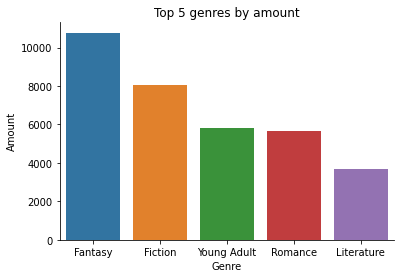

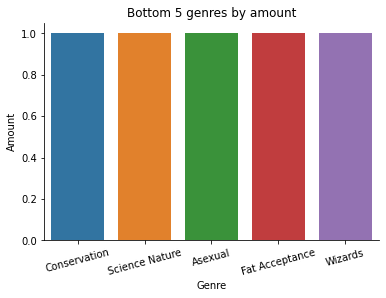

In [10]:
split_genres = books.loc[books.genres.notnull(), 'genres'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)
split_genres_counts = split_genres.value_counts().sort_values(ascending=False)

# Plot the top 5.
sns.barplot(y=split_genres_counts[:5], x=split_genres_counts.index[:5])
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Top 5 genres by amount')
plt.show()

# And the bottom 5.
g = sns.barplot(y=split_genres_counts[-5:], x=split_genres_counts.index[-5:])
g.set_xticklabels(g.get_xticklabels(), rotation=15, ha='center')
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Bottom 5 genres by amount')
plt.show()

### Preprocessing

In [35]:
genres_data = pd.read_csv('Genre List - Sheet1.csv', usecols = ['index', 'genres']).dropna(axis=0)

In [36]:
genres_data.tail(121)

,index,genres
9760,569,"Young ,Science Fiction,Dystopia,Science Fictio..."
9761,2900,"Young ,Science Fiction,Dystopia,Science Fictio..."
9762,3014,"Young ,Science Fiction,Dystopia,Science Fictio..."
9763,1153,"Young ,Science Fiction,Dystopia,Science Fictio..."
9764,2834,"Young ,Science Fiction,Dystopia,Science Fictio..."
...,...,...
9876,8244,"Young ,Fiction,Contemporary,Romance,Young ,Tee..."
9877,9289,"Young ,Fiction,Romance,Contemporary,New ,,Real..."
9878,5976,"Young ,Fiction,Romance,Contemporary,Realistic ..."
9879,9613,"Young ,Fiction,Romance,Contemporary,Young ,Tee..."


In [37]:
genres_data.shape

(9879, 2)

In [22]:
books.shape

(10000, 11)

In [240]:
book_data.drop_duplicates(subset='title', inplace=True)

book_data = book_data.reset_index()

In [241]:
book_data.shape

(9761, 12)

In [242]:
book_data[book_data['title'] == 'Kafka on the Shore']

,index,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url
0,0,Kafka on the Shore,海辺のカフカ [Umibe no Kafuka],NaN,English,"Haruki Murakami,Philip Gabriel (Translator)",4.13,337636,24038,"Fiction,Magical Realism,Fantasy,Cultural,Japan...","Kafka on the Shore , a tour de force of metaph...",https://www.goodreads.com/book/show/4929.Kafka...


In [243]:
book_data[book_data['genres'] == 'Fiction']

,index,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url
1481,1487,زندگی مه آلود پریا,زندگی مه آلود پریا,NaN,Persian,سید مرتضی مصطفوی,3.91,962,137,Fiction,Mystical story The internal revolution of a wo...,https://www.goodreads.com/book/show/40937505
1931,1941,The Beech Tree,The Beech Tree,NaN,English,Don Phelan,4.11,117,35,Fiction,The Beech Tree introduces you to the lives of ...,https://www.goodreads.com/book/show/30156088-t...
3268,3297,In and Out of Step,In and Out of Step,NaN,English,Christine M. Knight,4.02,104,67,Fiction,Think about the woman you’re becoming!’ Leonie...,https://www.goodreads.com/book/show/9634643-in...
3884,3925,"Past, Present, and Promises",NaN,NaN,English,"Patricia H. Graham,Verna C. Humphrey",4.02,41,9,Fiction,Our first story is called White Shine of Appal...,https://www.goodreads.com/book/show/14495404-p...
4023,4068,بعثة بدوي,NaN,NaN,Arabic,تركي العواد,3.26,709,82,Fiction,لحب هو كلّ شيء في هذه الحياة ولا يوجد شيء غيره...,https://www.goodreads.com/book/show/24956436
5526,5613,Relating Revolution: All It Takes Is One Perso...,NaN,NaN,English,"Kris Kelkar,Meenal Kelkar",4.37,623,7,Fiction,Do you find painful repeating patterns in your...,https://www.goodreads.com/book/show/50731987-r...
5901,6001,A Spy at Home,A Spy At Home,NaN,English,Joseph Rinaldo,3.74,38,24,Fiction,When Dad becomes the lone caregiver for a depe...,https://www.goodreads.com/book/show/8928799-a-...
5922,6023,Enjambre Sutil,NaN,NaN,Spanish,Jose Dellepiane,4.56,16,2,Fiction,7 STORIES MADE BY A YOUNG PROMISSORY WRITER TH...,https://www.goodreads.com/book/show/12715345-e...
8207,8397,An Omnibus: Dinner at the Homesick Restaurant ...,An Omnibus: Dinner at the Homesick Restaurant ...,NaN,NaN,Anne Tyler,4.13,689,17,Fiction,"No other writer captures like Anne Tyler, with...",https://www.goodreads.com/book/show/946516.An_...
9443,9668,Born Slippy,Born Slippy,NaN,NaN,"Tom Lutz,Alan Jacobs (Editor)",3.94,72,29,Fiction,A globetrotting novel about the seductions of ...,https://www.goodreads.com/book/show/52117102-b...


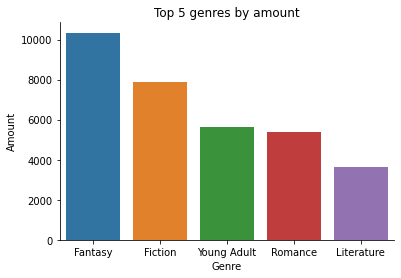

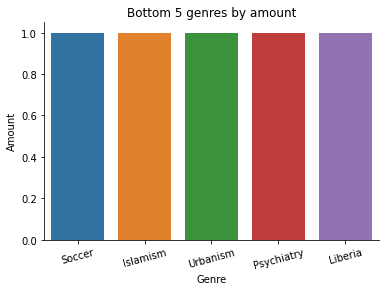

In [244]:
split_genres = book_data.loc[book_data.genres.notnull(), 'genres'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)
split_genres_counts = split_genres.value_counts().sort_values(ascending=False)

# Plot the top 5.
sns.barplot(y=split_genres_counts[:5], x=split_genres_counts.index[:5])
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Top 5 genres by amount')
plt.show()

# And the bottom 5.
g = sns.barplot(y=split_genres_counts[-5:], x=split_genres_counts.index[-5:])
g.set_xticklabels(g.get_xticklabels(), rotation=15, ha='center')
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Bottom 5 genres by amount')
plt.show()

In [245]:
lst_1 = [i for i in book_data[book_data['title'] == 'Kafka on the Shore']['genres']][0].split(",")
# lst_1 = lst_1[0].split(",")
print(lst_1)

['Fiction', 'Magical Realism', 'Fantasy', 'Cultural', 'Japan', 'Asian Literature', 'Japanese Literature', 'Contemporary', 'Novels', 'Literature', 'Literary Fiction', 'Cultural', 'Asia']


In [246]:
myset = set(lst_1)
print(myset)

{'Literary Fiction', 'Asia', 'Japan', 'Literature', 'Cultural', 'Magical Realism', 'Japanese Literature', 'Fantasy', 'Novels', 'Contemporary', 'Asian Literature', 'Fiction'}


In [247]:
print(len(lst_1), len(myset))

13 12


In [248]:
book_data = book_data[book_data.genres.notnull()]

In [249]:
len(book_data)

9644

In [257]:
from collections import Counter

# words = ['a', 'b', 'c', 'a']

# Counter(words).keys() # equals to list(set(words))
# Counter(words).values() # counts the elements' frequency


def main_func():
    mydict = dict()
    df = pd.DataFrame(columns = ['Genres', 'count'])
    for i, j in enumerate(book_data['genres']):
        mydict[i] = j
        mydict[i] = set(j.split(","))
        mydict[i] = list(mydict[i])
    
    x = mydict.values()
    x = list(x)
    x = sum(x, [])

    y = Counter(x).keys()
    for j in y:
        df.loc[len(df.index), 'Genres'] = j
    
    c = (Counter(x).values())
    df['count'] = c
    print(Counter(x).keys())
    print(Counter(x).values())
    df.sort_values('count', ascending = False, inplace=True)
    
    return df
    
df = main_func()
df.head()

dict_keys(['Literary Fiction', 'Asia', 'Japan', 'Literature', 'Cultural', 'Magical Realism', 'Japanese Literature', 'Fantasy', 'Novels', 'Contemporary', 'Asian Literature', 'Fiction', 'Classics', 'Self Help', 'Biography Memoir', 'Philosophy', 'Biography', 'Inspirational', 'Essays', 'Autobiography', 'Nonfiction', 'Writing', 'Memoir', 'Spirituality', 'Gothic', 'Books About Books', 'Book Club', 'Thriller', 'Mystery', 'Adult', 'Historical', 'Historical Fiction', 'Mystery Thriller', 'Comedy', 'Adventure', 'Science Fiction Fantasy', 'Audiobook', 'Young Adult', 'Magic', 'Humor', 'Theatre', 'Plays', 'Classic Literature', 'Poetry', 'Drama', 'Reference', 'European Literature', 'Academic', 'British Literature', '18th Century', 'School', 'Love Story', 'Romance', 'New Adult', 'Christian Fiction', 'Christian', 'Childrens', 'Middle Grade', 'German Literature', 'Short Stories', 'Fairy Tales', 'Mythology', 'Health', 'Womens', 'Canada', 'Mental Health', 'Feminism', 'War', 'Supernatural', 'Horror', 'Susp

,Genres,count
11,Fiction,7862
7,Fantasy,4124
37,Young Adult,3551
52,Romance,3502
9,Contemporary,2564


In [258]:
df.reset_index(drop=True, inplace=True)
df.head()

,Genres,count
0,Fiction,7862
1,Fantasy,4124
2,Young Adult,3551
3,Romance,3502
4,Contemporary,2564


In [259]:
# df.to_csv('genres.csv', index = False)

### Working on the weighted average

In [86]:
# Mean
C = book_data['avg_rating'].mean()
C

4.053952463886898

In [87]:
m = book_data['num_ratings'].quantile(0.1)
m

2422.0

In [88]:
def weighted_rating(book, m, C):
    # Average rating for the book.
    R = book['avg_rating']
    # Total number of votes for the book.
    v = book['num_ratings']
    # IMDB formula.
    return (v / (v+m) * R) + (m / (m+v) * C)

# Calculate the weighted rating for books that are within our threshold.
book_data.loc[book_data.num_ratings > m, 'weighted_rating'] = book_data.loc[book_data.num_ratings > m].apply(lambda x: weighted_rating(x, m, C), axis=1)

# Fill the NaN values (i.e., books lower than our threshold) with a zero score.
book_data['weighted_rating'].fillna(0, inplace=True)

In [89]:
book_data.head()


,index,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url,weighted_rating
0,0,Kafka on the Shore,海辺のカフカ [Umibe no Kafuka],NaN,English,"Haruki Murakami,Philip Gabriel (Translator)",4.13,337636,24038,"Fiction,Magical Realism,Fantasy,Cultural,Japan...","Kafka on the Shore , a tour de force of metaph...",https://www.goodreads.com/book/show/4929.Kafka...,4.129458
1,1,Gift from the Sea,Gift from the Sea,NaN,English,Anne Morrow Lindbergh,4.14,44607,4217,"Nonfiction,Autobiography,Memoir,Classics,Inspi...","In this inimitable, beloved classic—graceful, ...",https://www.goodreads.com/book/show/77295.Gift...,4.135569
2,2,The Thirteenth Tale,The Thirteenth Tale,NaN,English,Diane Setterfield,3.96,285850,23648,"Fiction,Mystery,Historical,Historical Fiction,...",All children mythologize their birth...So begi...,https://www.goodreads.com/book/show/40440.The_...,3.960789
3,3,Mort,Mort,Discworld,English,Terry Pratchett,4.21,211312,5478,"Fantasy,Fiction,Humor,Humor,Comedy,Science Fic...",Terry Pratchett's profoundly irreverent novels...,https://www.goodreads.com/book/show/386372.Mort,4.208232
4,4,The Complete Works,The Complete Works of William Shakespeare,NaN,English,William Shakespeare,4.48,53001,886,"Classics,Poetry,Fiction,Plays,Drama,Literature...",Tempest Two Gentlemen of Verona Merry Wives of...,https://www.goodreads.com/book/show/569564.The...,4.461382


In [90]:
book_data.sort_values('weighted_rating', ascending=False).head(5)

,index,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url,weighted_rating
7936,8114,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",NaN,NaN,English,"J.K. Rowling,Mary GrandPré (Illustrator)",4.79,61723,185,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Adve...",Box Set containing Harry Potter and the Sorcer...,https://www.goodreads.com/book/show/8.Harry_Po...,4.762208
1627,1636,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,Calvin and Hobbes,English,Bill Watterson,4.79,36926,1058,"Sequential Art,Comics,Humor,Sequential Art,Gra...",[ Box Set | Book One | Book Two | Book Three...,https://www.goodreads.com/book/show/24812.The_...,4.744694
1178,1180,Words of Radiance,Words of Radiance,The Stormlight Archive,English,Brandon Sanderson,4.74,233790,14019,"Fantasy,Fiction,Fantasy,Epic Fantasy,Fantasy,H...","Words of Radiance, Book Two of the Stormlight ...",https://www.goodreads.com/book/show/17332218-w...,4.732966
1401,1406,Harry Potter Series Box Set,NaN,Harry Potter,English,J.K. Rowling,4.72,262037,7579,"Fantasy,Young Adult,Fiction,Childrens,Fantasy,...","Over 4000 pages of Harry Potter and his world,...",https://www.goodreads.com/book/show/862041.Har...,4.713900
9397,9621,Know My Name,Know My Name,NaN,English,Chanel Miller,4.72,89328,13178,"Nonfiction,Autobiography,Memoir,Feminism,Audio...",She was known to the world as Emily Doe when s...,https://www.goodreads.com/book/show/50196744-k...,4.702418


In [91]:
del C
del m

### Removing the other language books

In [92]:
book_data.shape

(9761, 13)

In [93]:
def remove_other_language(df):
    for i in range(len(df)):
        if df.loc[i, "language"] != 'English':
            df.drop(i, axis = 0, inplace =True)
            
    return df
        
book_data = remove_other_language(book_data)
book_data.shape

(8948, 13)

### NLP and Making Soup

In [94]:
def clean_string(s):
    stop = stopwords.words('english') + list(string.punctuation)
    return [n for n in wordpunct_tokenize(s.lower()) if n not in stop]

def create_soup(x):
    title_importance = 1
    language_importance = 1
    series_importance = 1
    authors_importance = 1
    genres_importance = 1

    soup = ''
    

    desc = x['description']
    if desc is not np.nan:
        rake = Rake()
        rake.extract_keywords_from_text(desc)
        desc_soup = ' '.join(list(rake.get_word_degrees().keys()))
        soup = ' '.join(filter(None, [soup, desc_soup]))
    
    # Title.
    title_soup = ' '.join(clean_string(x['title']) * title_importance)
    soup = ' '.join(filter(None, [soup, title_soup]))
    
    # Language.
    language = x['language']
    if language is not np.nan:
        language_soup = ' '.join(clean_string(language) * language_importance)
        soup = ' '.join(filter(None, [soup, language_soup]))
    
    # Series.
    series = x['series']
    if series is not np.nan:
        series_soup = ' '.join(clean_string(series) * series_importance)
        soup = ' '.join(filter(None, [soup, series_soup]))

    # Authors.
    authors = x['authors']
    if authors is not np.nan:

        author_soup = ' '.join([a.lower().replace(' ', '') for a in authors.split(',')] * authors_importance)
        soup = ' '.join(filter(None, [soup, author_soup]))
    
    # Genres.
    genres = x['genres']
    if genres is not np.nan:

        genre_soup = ' '.join([g.lower().replace(' ', '') for g in genres.split(',')] * genres_importance)
        soup = ' '.join(filter(None, [soup, genre_soup]))
    
    return soup

book_data['soup'] = book_data.apply(create_soup, axis=1)

In [95]:
book_data.head()

,index,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url,weighted_rating,soup
0,0,Kafka on the Shore,海辺のカフカ [Umibe no Kafuka],NaN,English,"Haruki Murakami,Philip Gabriel (Translator)",4.13,337636,24038,"Fiction,Magical Realism,Fantasy,Cultural,Japan...","Kafka on the Shore , a tour de force of metaph...",https://www.goodreads.com/book/show/4929.Kafka...,4.129458,victim vivid accomplices long mesmerizing even...
1,1,Gift from the Sea,Gift from the Sea,NaN,English,Anne Morrow Lindbergh,4.14,44607,4217,"Nonfiction,Autobiography,Memoir,Classics,Inspi...","In this inimitable, beloved classic—graceful, ...",https://www.goodreads.com/book/show/77295.Gift...,4.135569,gift multiple commitments 1955 beach contempla...
2,2,The Thirteenth Tale,The Thirteenth Tale,NaN,English,Diane Setterfield,3.96,285850,23648,"Fiction,Mystery,Historical,Historical Fiction,...",All children mythologize their birth...So begi...,https://www.goodreads.com/book/show/40440.The_...,3.960789,thirteenth tale fortune return brought hidden ...
3,3,Mort,Mort,Discworld,English,Terry Pratchett,4.21,211312,5478,"Fantasy,Fiction,Humor,Humor,Comedy,Science Fic...",Terry Pratchett's profoundly irreverent novels...,https://www.goodreads.com/book/show/386372.Mort,4.208232,compulsory catapulted everything mort thought ...
4,4,The Complete Works,The Complete Works of William Shakespeare,NaN,English,William Shakespeare,4.48,53001,886,"Classics,Poetry,Fiction,Plays,Drama,Literature...",Tempest Two Gentlemen of Verona Merry Wives of...,https://www.goodreads.com/book/show/569564.The...,4.461382,tempest two gentlemen lucrece sonnets lover no...


In [96]:
book_data.title = book_data['title'].str.lower()

In [97]:
list(book_data[book_data['title'] == 'kafka on the shore'].description)

['Kafka on the Shore , a tour de force of metaphysical reality, is powered by two remarkable characters: a teenage boy, Kafka Tamura, who runs away from home either to escape a gruesome oedipal prophecy or to search for his long-missing mother and sister; and an aging simpleton called Nakata, who never recovered from a wartime affliction and now is drawn toward Kafka for reasons that, like the most basic activities of daily life, he cannot fathom. Their odyssey, as mysterious to them as it is to us, is enriched throughout by vivid accomplices and mesmerizing events. Cats and people carry on conversations, a ghostlike pimp employs a Hegel-quoting prostitute, a forest harbors soldiers apparently unaged since World War II, and rainstorms of fish (and worse) fall from the sky. There is a brutal murder, with the identity of both victim and perpetrator a riddle—yet this, along with everything else, is eventually answered, just as the entwined destinies of Kafka and Nakata are gradually revea

In [98]:
list(book_data[book_data['title'] == 'kafka on the shore'].soup)

['victim vivid accomplices long mesmerizing events never recovered worse nakata tour de force enriched throughout escape runs away eventually answered brutal murder kafka conversations fish fall ghostlike pimp employs gradually revealed quoting prostitute drawn toward tamura like gruesome oedipal prophecy reasons perpetrator given identity fresh start home either mysterious search hegel cannot fathom metaphysical reality aging simpleton called wartime affliction us sky fate entirely shore odyssey basic activities cats people carry riddle — yet forest harbors soldiers apparently unaged since world war ii sister along entwined destinies one escaping teenage boy everything else missing mother powered daily life rainstorms two remarkable characters kafka shore english harukimurakami philipgabriel(translator) fiction magicalrealism fantasy cultural japan asianliterature japaneseliterature contemporary novels literature literaryfiction cultural asia']

In [99]:
book_data.soup

0       victim vivid accomplices long mesmerizing even...
1       gift multiple commitments 1955 beach contempla...
2       thirteenth tale fortune return brought hidden ...
3       compulsory catapulted everything mort thought ...
4       tempest two gentlemen lucrece sonnets lover no...
                              ...                        
9755    romeo prince molly soon realises football know...
9756    dreaming cooking school long suffering widow d...
9757    seven james gina vile wanted dreams come true ...
9759    adventure characters eleven sisters something ...
9760    razor wire new partitions racism taken consume...
Name: soup, Length: 8948, dtype: object

### Similarity matrix

In [100]:
count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(book_data['soup'])

from sklearn.metrics.pairwise import linear_kernel
cos_sim = cosine_similarity(count_matrix, count_matrix)

## FInal Recommendation

In [101]:
title_to_index = pd.Series(book_data.index, index=book_data['title'])

def get_recommendation(title):
    title = title.lower()
    idx = title_to_index[title]
#     print(idx)
    print(book_data.loc[idx].soup)
    print('\n')
    scores = pd.Series(cos_sim[idx]).sort_values(ascending=False)
    book_indices = list(scores.iloc[1:11].index)
    
#     scores = list(enumerate(cos_sim[idx]))
#     scores = sorted(scores, key=lambda x: x[1], reverse=True)
#     scores = scores[1:11]
#     book_indices = [i[0] for i in scores]
#     print(scores[1:11])
    x = (book_data.iloc[book_indices, 1].to_string())
    print(x)
    return book_data.iloc[book_indices]

# get_recommendation('Harry Potter and the Chamber of Secrets')
get_recommendation("pride and prejudice")

proud beau prejudice elizabeth bennet ever appeared pride regency england remained one book delightful jane austen opinionated superb comedy characters dance english language vivacious heroine darcy making delicate quadrille manners alternate cover edition called print ." 1813 brilliant work mr isbn 9780679783268 since radiant wit sparkles immediate success creature popular novels flirtation civilized sparring romantic clash splendid performance darling child intrigue pride prejudice english janeausten annaquindlen(introduction) classics fiction romance historical historicalfiction literature historical novels romance historicalromance adult audiobook


3002                love, stargirl
3137          a mango-shaped space
2478    that was then, this is now
594                        flipped
5946                  dicey's song
2177              freak the mighty
4454                     teen idol
8387             you don't know me
8845        if he had been with me
5731                   

,index,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url,weighted_rating,soup
3002,3025,"love, stargirl","Love, Stargirl",Stargirl,English,Jerry Spinelli,3.82,39886,3354,"Young Adult,Fiction,Realistic Fiction,Contempo...","LOVE, STARGIRL picks up a year after Stargirl...",https://www.goodreads.com/book/show/846984.Lov...,3.833393,new people course arizona suddenly date bitter...
3137,3162,a mango-shaped space,A Mango-Shaped Space,NaN,English,Wendy Mass,4.22,29733,2917,"Young Adult,Realistic Fiction,Fiction,Children...","Mia Winchell appears to be a typical kid, but ...",https://www.goodreads.com/book/show/171020.A_M...,4.207493,secret accept one knows words trouble ability ...
2478,2494,"that was then, this is now","That Was Then, This Is Now",NaN,English,S.E. Hinton,3.92,30289,1896,"Young Adult,Fiction,Classics,Young Adult,Comin...",Does growing up have to mean growing apart? Si...,https://www.goodreads.com/book/show/33569.That...,3.929918,bryon faces girls growing changing shocking di...
594,594,flipped,Flipped,NaN,English,Wendelin Van Draanen,3.95,102835,7808,"Young Adult,Romance,Fiction,Contemporary,Reali...",Flipped is a romance told in two voices. The f...,https://www.goodreads.com/book/show/331920.Fli...,3.952392,first time juli baker saw bryce loski flipped ...
5946,6047,dicey's song,Dicey's Song,Tillerman Cycle,English,Cynthia Voigt,3.97,17399,722,"Young Adult,Fiction,Childrens,Realistic Fictio...",Now that the four abandoned Tillerman children...,https://www.goodreads.com/book/show/11831.Dice...,3.980258,four abandoned tillerman children trust new be...
2177,2190,freak the mighty,Freak the Mighty,Freak The Mighty,English,Rodman Philbrick,4.01,46169,4575,"Young Adult,Realistic Fiction,Fiction,Children...",Two boys – a slow learner stuck in the body of...,https://www.goodreads.com/book/show/8953.Freak...,4.012191,slow learner stuck shame imperfection two boys...
4454,4508,teen idol,Teen Idol,NaN,English,Meg Cabot,3.53,23653,968,"Young Adult,Romance,Contemporary,Womens Fictio...",High school junior Jenny Greenley is so good a...,https://www.goodreads.com/book/show/90475.Teen...,3.578668,tabloids alike — know paparazzi luke wraps hig...
8387,8581,you don't know me,You Don't Know Me,NaN,English,David Klass,3.89,8718,670,"Young Adult,Fiction,Realistic Fiction,Sociolog...","John (""My father named me after a toilet!"") wr...",https://www.goodreads.com/book/show/457557.You...,3.925646,ridden adolescent emotionally true multilayere...
8845,9048,if he had been with me,NaN,NaN,English,Laura Nowlin,4.11,7900,1439,"Young Adult,Romance,Contemporary,Realistic Fic...",If he had been with me everything would have b...,https://www.goodreads.com/book/show/15835031-i...,4.096849,august night important course facts one ever s...
5731,5827,smack,Junk,NaN,English,Melvin Burgess,3.89,18725,780,"Young Adult,Fiction,Contemporary,Young Adult,T...",Two teens fall in love with each other and her...,https://www.goodreads.com/book/show/824508.Smack,3.908778,whereas gemma next despair heroin first hit br...


### Rough Work

In [50]:
# title_importance = 1
# title_soup = ' '.join(('Anshul') * title_importance)
# soup = ' '.join(filter(None, [soup, title_soup]))

In [127]:
xyz = pd.DataFrame(data=data, columns = ['Day', 'Weather', 'Temperature', 'Wind', 'Humidity'])

data = {'Weather': ['Sunny', 'Sunny', 'Sunny', 'cloudy', 'shower', 'shower', 'sunny'],
        'Day': ['Mon', 'Tue', 'Wedn', 'Thurs', 'Fri', 'Sat', 'Sun'],
        'Temperature': [12.55, 78, 56, 88, 77, 14, 7],
        'Wind': [20,21,22,23,24,25,26],
        'Humidity': [100,200, 300,400, 500,600, 700]}

xyz.loc[len(xyz.index)] = ['mercedes', 'tues', 44, 10000, 56]
xyz.set_index('Day', inplace= True)
xyz.head(10)

,Weather,Temperature,Wind,Humidity
Day,,,,
Mon,Sunny,12.55,20,100
Tue,Sunny,78.00,21,200
Wedn,Sunny,56.00,22,300
Thurs,cloudy,88.00,23,400
Fri,shower,77.00,24,500
Sat,shower,14.00,25,600
Sun,sunny,7.00,26,700
mercedes,tues,44.00,10000,56


In [141]:
xyz.iloc[2, 2]

22

In [ ]:
# loc[row_label, column_label]
# iloc[row_position, column_position]

In [143]:
print(xyz.loc['Mon', 'Temperature'])

12.55
